In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#导入必要的库

In [18]:
#读取数据，0对应第一支股票，1对应第二只，以此类推
df1=pd.read_excel('data.xlsx',0) 
df1=df1.iloc[3600:-10,1:]#选取从第3600行开始的数据 大概是2006年一月
df1.tail()

,开盘,最高,最低,收盘,涨幅,振幅,总手,金额,换手%,成交次数,target
6920,1630.46,1665.46,1614.20,1656.71,0.036,0.0321,118020026,1472909400,0.608,67052,1689.22
6921,1690.47,1714.22,1667.96,1689.22,0.0196,0.0279,113695774,1467535000,0.586,60751,1712.97
6922,1677.96,1747.98,1670.46,1712.97,0.0141,0.0459,107519243,1408651100,0.554,59522,1724.22
6923,1736.72,1752.98,1715.47,1724.22,0.0066,0.0219,65301888,861618660,0.337,38464,1697.97
6924,1686.72,1710.47,1675.46,1697.97,-0.0152,0.0203,66173879,852956240,0.341,37324,1680.46


In [19]:
#进行数据归一化
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
df0=min_max_scaler.fit_transform(df1)
df = pd.DataFrame(df0, columns=df1.columns)
X=df.iloc[:,:-1]
y=df['target']#切片是前闭后开[)
print(X.shape)
print(y.shape)

(3325, 10)
(3325,)


In [20]:
#构造训练集测试集 
y=pd.DataFrame(y.values,columns=['goal'])
x=X
cut=10#取最后cut=10天为测试集
X_train, X_test=x.iloc[:-cut],x.iloc[-cut:]#列表的切片操作，X.iloc[0:2400，0:7]即为1-2400行，1-7列
y_train, y_test=y.iloc[:-cut],y.iloc[-cut:]
X_train,X_test,y_train,y_test=X_train.values,X_test.values,y_train.values,y_test.values
print(X_train.size)#通过输出训练集测试集的大小来判断数据格式正确。
print(X_test.size)
print(y_train.size)
print(y_test.size)

33150
100
3315
10


In [21]:
#建立bp模型 训练 
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import Adam
model = Sequential()  #层次模型
model.add(Dense(16,input_dim=10,kernel_initializer='uniform')) #输入层，Dense表示BP层
model.add(Activation('relu'))  #添加激活函数
model.add(Dense(4,bias_initializer='uniform',)) #中间层
model.add(Activation('sigmoid'))  #添加激活函数
model.add(Dense(1))  #输出层
model.compile(loss='mean_squared_error', optimizer='Adam') #编译模型
model.fit(X_train, y_train, epochs = 50, batch_size = 256) #训练模型nb_epoch=50次

Epoch 1/50
13/13 [==============================] - 1s 2ms/step - loss: 0.1500
Epoch 2/50
13/13 [==============================] - 0s 3ms/step - loss: 0.1140
Epoch 3/50
13/13 [==============================] - 0s 2ms/step - loss: 0.0839
Epoch 4/50
13/13 [==============================] - 0s 8ms/step - loss: 0.0613
Epoch 5/50
13/13 [==============================] - 0s 2ms/step - loss: 0.0457
Epoch 6/50
13/13 [==============================] - 0s 2ms/step - loss: 0.0366
Epoch 7/50
13/13 [==============================] - 0s 2ms/step - loss: 0.0316
Epoch 8/50
13/13 [==============================] - 0s 2ms/step - loss: 0.0286
Epoch 9/50
13/13 [==============================] - 0s 2ms/step - loss: 0.0265
Epoch 10/50
13/13 [==============================] - 0s 2ms/step - loss: 0.0246
Epoch 11/50
13/13 [==============================] - 0s 2ms/step - loss: 0.0227
Epoch 12/50
13/13 [==============================] - 0s 4ms/step - loss: 0.0209
Epoch 13/50
13/13 [==============================

In [22]:
model.summary()#模型描述

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 16)                176       
                                                                 
 activation_5 (Activation)   (None, 16)                0         
                                                                 
 dense_8 (Dense)             (None, 4)                 68        
                                                                 
 activation_6 (Activation)   (None, 4)                 0         
                                                                 
 dense_9 (Dense)             (None, 1)                 5         
                                                                 
Total params: 249
Trainable params: 249
Non-trainable params: 0
_________________________________________________________________


In [23]:
#在训练集上的拟合结果
y_train_predict=model.predict(X_train)
y_train_predict=y_train_predict[:,0]
y_train=y_train

104/104 [==============================] - 0s 2ms/step


Text(0.5, 1.0, 'Train Data')

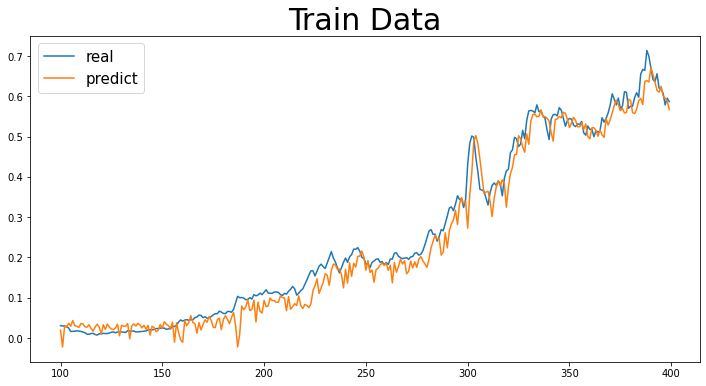

In [24]:
draw=pd.concat([pd.DataFrame(y_train),pd.DataFrame(y_train_predict)],axis=1)
draw.iloc[100:400,0].plot(figsize=(12,6))
draw.iloc[100:400,1].plot(figsize=(12,6))
plt.legend(('real', 'predict'),fontsize='15')
plt.title("Train Data",fontsize='30') #添加标题
#展示在训练集上的表现 

In [25]:
#在测试集上的预测
y_test_predict=model.predict(X_test)
y_test_predict=y_test_predict[:,0]

1/1 [==============================] - 0s 22ms/step


Text(0.5, 1.0, 'Test Data')

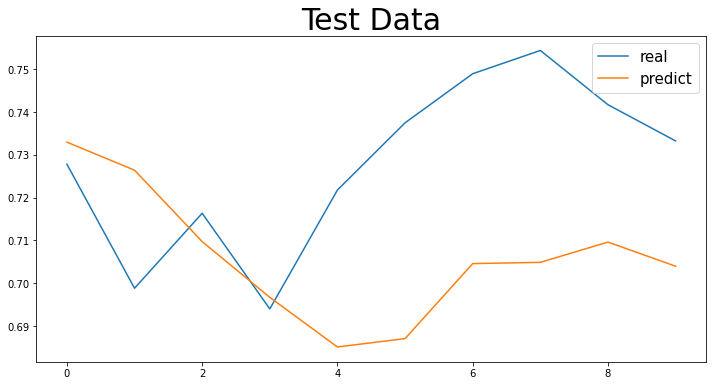

In [26]:
draw=pd.concat([pd.DataFrame(y_test),pd.DataFrame(y_test_predict)],axis=1);
draw.iloc[:,0].plot(figsize=(12,6))
draw.iloc[:,1].plot(figsize=(12,6))
plt.legend(('real', 'predict'),loc='upper right',fontsize='15')
plt.title("Test Data",fontsize='30') #添加标题
#展示在测试集上的表现 

In [27]:
#输出结果
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import math
def mape(y_true, y_pred):
    return np.mean(np.abs((y_pred - y_true) / y_true)) * 100
print('训练集上的MAE/MSE/MAPE')
print(mean_absolute_error(y_train_predict, y_train))
print(mean_squared_error(y_train_predict, y_train) )
print(mape(y_train_predict, y_train) )
print('测试集上的MAE/MSE/MAPE')
print(mean_absolute_error(y_test_predict, y_test))
print(mean_squared_error(y_test_predict, y_test) )
print(mape(y_test_predict, y_test) )
y_var_test=y_test[1:]-y_test[:len(y_test)-1]
y_var_predict=y_test_predict[1:]-y_test_predict[:len(y_test_predict)-1]
txt=np.zeros(len(y_var_test))
for i in range(len(y_var_test-1)):
    txt[i]=np.sign(y_var_test[i])==np.sign(y_var_predict[i])
result=sum(txt)/len(txt)
print('预测涨跌正确:',result)

训练集上的MAE/MSE/MAPE
0.024248698844415884
0.0013766094025236021
238.635827959685
测试集上的MAE/MSE/MAPE
0.0284227768570527
0.001101967134011044
3.8536662447164223
预测涨跌正确: 0.6666666666666666
